## Customer Churn Analysis in Telecom Industry
We are going to use scikit-learn library with python to predict customer churn in the telecom industry

In [3]:
#import python libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from IPython.display import display, HTML

Lets read our data using pandas and then view the head of the df frame

In [58]:
df = pd.read_csv("telecom_churn.csv")
display(df.head())

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


## Data exploration 
Lets perform some initial data exploration to determine the following
- how much data we have 
- if there are missing values
- what data type each column is 
- the distribution of data in each column

In [10]:
print("Number of rows: ", df.shape)

Number of rows:  (3333, 20)


In [8]:
print(df.columns)

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')


In [37]:
df.isnull().any()

State                     False
Account length            False
Area code                 False
International plan        False
Voice mail plan           False
Number vmail messages     False
Total day minutes         False
Total day calls           False
Total day charge          False
Total eve minutes         False
Total eve calls           False
Total eve charge          False
Total night minutes       False
Total night calls         False
Total night charge        False
Total intl minutes        False
Total intl calls          False
Total intl charge         False
Customer service calls    False
Churn                     False
dtype: bool

In [36]:
df.dtypes

State                      object
Account length              int64
Area code                   int64
International plan         object
Voice mail plan            object
Number vmail messages       int64
Total day minutes         float64
Total day calls             int64
Total day charge          float64
Total eve minutes         float64
Total eve calls             int64
Total eve charge          float64
Total night minutes       float64
Total night calls           int64
Total night charge        float64
Total intl minutes        float64
Total intl calls            int64
Total intl charge         float64
Customer service calls      int64
Churn                        bool
dtype: object

In [11]:
counts = df.describe().iloc[0]
display(
    pd.DataFrame(
        counts.tolist(), 
        columns=["Count of values"], 
        index=counts.index.values
    ).transpose()
)

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Count of values,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0,3333.0


All our dataset have no missing values if not we will have gone into filling in missing values, change dates and numbers in incorrect formats
extracting features out of text and so on

## Data Visualization 
we are going to perform so basic data visualisation 

(array([ 99., 227., 499., 734., 767., 575., 286., 111.,  28.,   7.]),
 array([  1. ,  25.2,  49.4,  73.6,  97.8, 122. , 146.2, 170.4, 194.6,
        218.8, 243. ]),
 <a list of 10 Patch objects>)

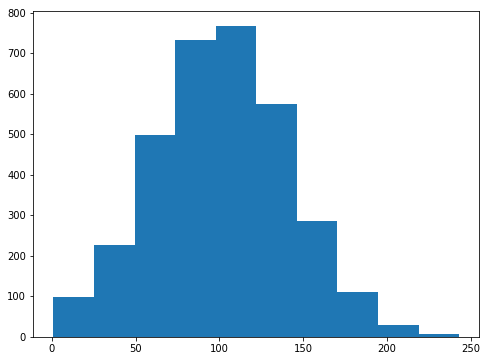

In [19]:
%matplotlib inline

plt.figure(num=1, figsize=(8,6))
hist(df['Account length'])

(array([ 2.,  4.,  9.,  7.,  9., 11., 17.,  4.,  5.,  2.]),
 array([ 24. ,  40.2,  56.4,  72.6,  88.8, 105. , 121.2, 137.4, 153.6,
        169.8, 186. ]),
 <a list of 10 Patch objects>)

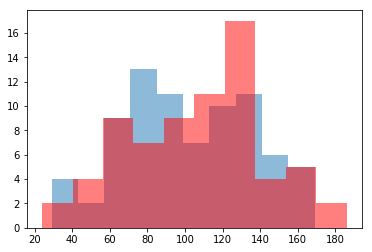

In [28]:
al_oh=df.ix[df.State=="OH",'Account length'] #just getting account length value out of the data frame for state==OH
al_ks=df.ix[df.State=="KS",'Account length'] #doing the same

#what gets returned is numpy array. converting to list as well:
#type(al_oh)
al_oh=list(al_oh)
al_ks=list(al_ks)
plt.figure(1)
plt.subplot(1,1,1)
plt.hist(al_oh,alpha=0.5)
plt.hist(al_ks,alpha=0.5,color='r')



We assume that the persons phone number, geographical location does not affect churn. so we drop all these features

In [38]:
df.groupby('Churn').mean()

,Account length,Area code,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls
Churn,,,,,,,,,,,,,,,,
False,100.793684,437.074737,8.604561,175.175754,100.283158,29.780421,199.043298,100.038596,16.918909,200.133193,100.058246,9.006074,10.158877,4.532982,2.743404,1.449825
True,102.664596,437.817805,5.115942,206.914079,101.335404,35.175921,212.410145,100.561077,18.054969,205.231677,100.399586,9.235528,10.700000,4.163561,2.889545,2.229814


In [25]:
display(df.tail(10))

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3323,IN,117,415,No,No,0,118.4,126,20.13,249.3,97,21.19,227.0,56,10.22,13.6,3,3.67,5,True
3324,WV,159,415,No,No,0,169.8,114,28.87,197.7,105,16.80,193.7,82,8.72,11.6,4,3.13,1,False
3325,OH,78,408,No,No,0,193.4,99,32.88,116.9,88,9.94,243.3,109,10.95,9.3,4,2.51,2,False
3326,OH,96,415,No,No,0,106.6,128,18.12,284.8,87,24.21,178.9,92,8.05,14.9,7,4.02,1,False
3327,SC,79,415,No,No,0,134.7,98,22.90,189.7,68,16.12,221.4,128,9.96,11.8,5,3.19,2,False
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [43]:
df.mean()

Account length            101.064806
Area code                 437.182418
Number vmail messages       8.099010
Total day minutes         179.775098
Total day calls           100.435644
Total day charge           30.562307
Total eve minutes         200.980348
Total eve calls           100.114311
Total eve charge           17.083540
Total night minutes       200.872037
Total night calls         100.107711
Total night charge          9.039325
Total intl minutes         10.237294
Total intl calls            4.479448
Total intl charge           2.764581
Customer service calls      1.562856
Churn                       0.144914
dtype: float64

In [68]:
# Convert all categorical variables to binary
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()
df["Churn"] = lb_make.fit_transform(df["Churn"])
df["International plan"] = lb_make.fit_transform(df["International plan"])
df["Voice mail plan"] = lb_make.fit_transform(df["Voice mail plan"])

In [69]:
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,0,1,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,0
1,OH,107,415,0,1,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,0
2,NJ,137,415,0,0,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,0
3,OH,84,408,1,0,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,0
4,OK,75,415,1,0,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,0


In [70]:
# Drop the columns that we have decided won't be used in prediction
df = df.drop([ "Area code", "State"], axis=1)
features = df.drop(["Churn"], axis=1).columns

## Fitting a Model
we split the data into training and test


In [71]:
df_train, df_test = train_test_split(df, test_size=0.25)

In [73]:
print(df_train.columns)

Index(['Account length', 'International plan', 'Voice mail plan',
       'Number vmail messages', 'Total day minutes', 'Total day calls',
       'Total day charge', 'Total eve minutes', 'Total eve calls',
       'Total eve charge', 'Total night minutes', 'Total night calls',
       'Total night charge', 'Total intl minutes', 'Total intl calls',
       'Total intl charge', 'Customer service calls', 'Churn'],
      dtype='object')


In [75]:
print(df_test.shape, df_train.shape)

(834, 18) (2499, 18)


In [76]:
clf = RandomForestClassifier(n_estimators = 30)
clf.fit(df_train[features], df_train["Churn"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=30, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [80]:
#Make Predictions
predictions = clf.predict(df_test[features])
probs = clf.predict_proba(df_test[features])
display(predictions)

array([0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0,

In [81]:
score = clf.score(df_test[features], df_test["Churn"])
print("Accuracy:", score)

Accuracy: 0.9448441247002398


,Predicted False,Predicted True
Actual False,698,8
Actual True,38,90


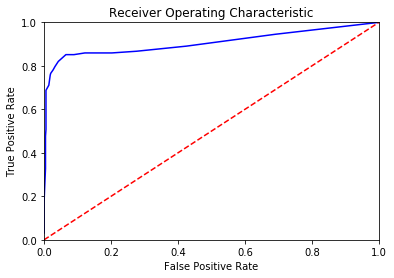

In [82]:
get_ipython().magic('matplotlib inline')
confusion_matrix = pd.DataFrame(
    confusion_matrix(df_test["Churn"], predictions), 
    columns=["Predicted False", "Predicted True"], 
    index=["Actual False", "Actual True"]
)
display(confusion_matrix)

# Calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = roc_curve(df_test["Churn"], probs[:,1])
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()


We can also plot feature importance to gain some insight as to what features were most useful in our model, which will be of great help when refining our model in the future.

,importance,labels
4,0.169897,Total day minutes
6,0.132111,Total day charge
16,0.104905,Customer service calls
1,0.081832,International plan
9,0.066785,Total eve charge


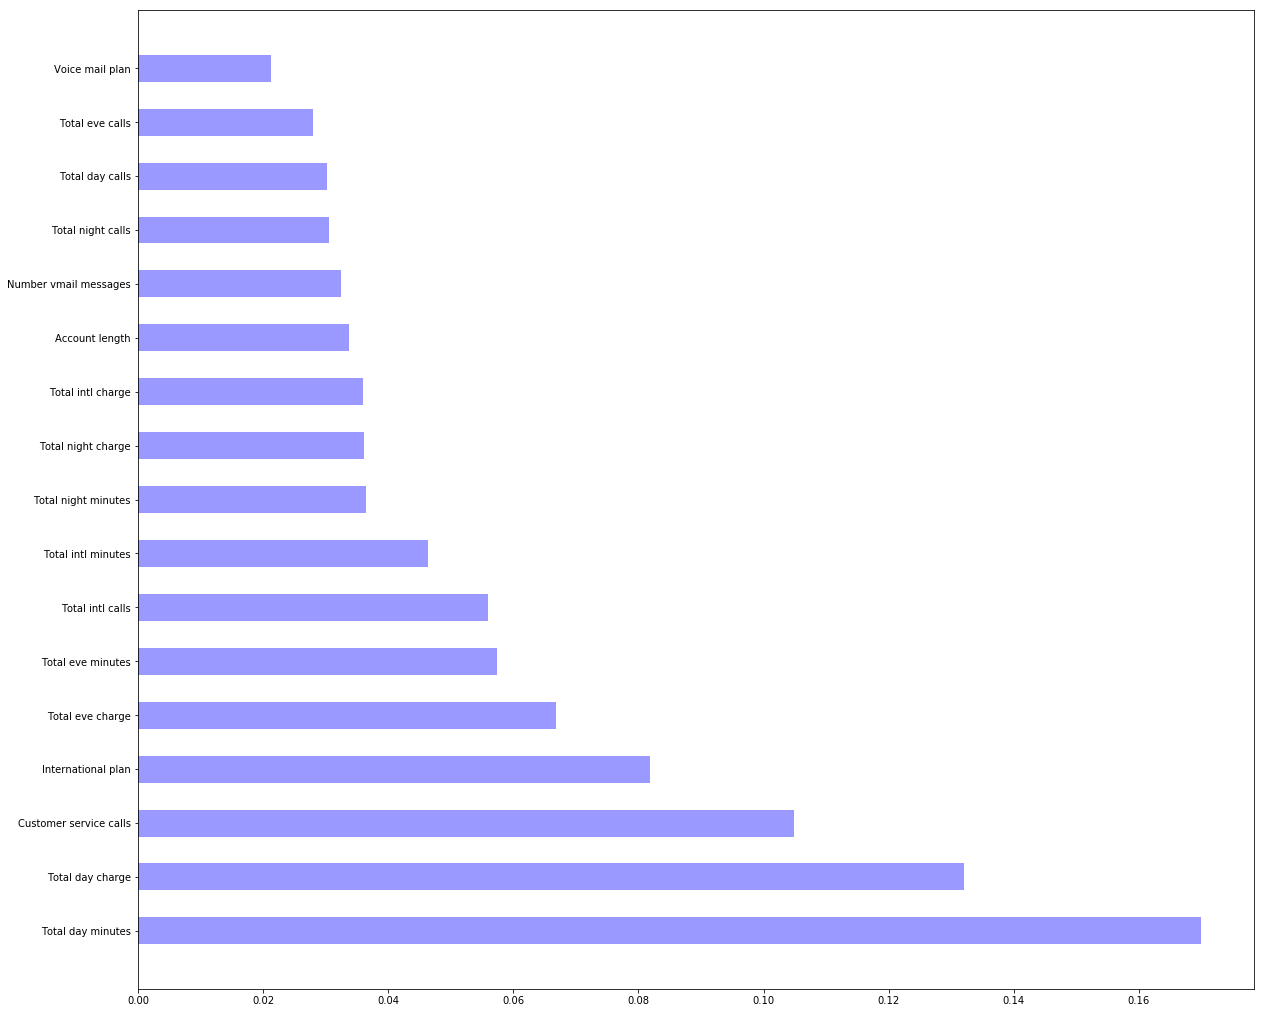

In [86]:
fig = plt.figure(figsize=(20, 18))
ax = fig.add_subplot(111)

df_f = pd.DataFrame(clf.feature_importances_, columns=["importance"])
df_f["labels"] = features
df_f.sort_values("importance", inplace=True, ascending=False)
display(df_f.head(5))

index = np.arange(len(clf.feature_importances_))
bar_width = 0.5
rects = plt.barh(index , df_f["importance"], bar_width, alpha=0.4, color='b', label='Main')
plt.yticks(index, df_f["labels"])
plt.show()

## Results 
The output of this exercise is a corresponding score (representing churn propensity) for each client, as can been seen below. For insight into how these scores could be leveraged by your business, keep reading the next section.

In [89]:
df_test["prob_true"] = probs[:, 1]
df_risky = df_test[df_test["prob_true"] > 0.9]
display(df_risky.head(25)[["prob_true"]])

/Users/online1/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,prob_true
2113,1.000000
605,1.000000
2155,1.000000
3144,0.933333
1934,0.966667
2343,0.933333
1881,0.933333
2647,0.966667
2908,0.966667
629,0.966667


In [90]:
df.reset_index(inplace=True)